In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("combined_data.csv")
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
labels = {0 : "Not Spam", 1 : "Spam"}
label_count = df['label'].value_counts()
print(label_count)

label
1    43910
0    39538
Name: count, dtype: int64


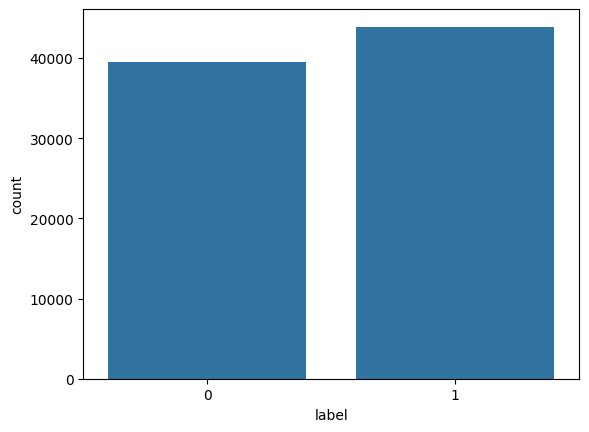

In [5]:
sns.countplot(x = "label", data = df)
plt.show()

In [6]:
# Handling Duplicates

print("Number of Duplicates", np.sum(df.duplicated()))
df.drop_duplicates(inplace=True)
print("After Dropping Duplicates", np.sum(df.duplicated()))

Number of Duplicates 0
After Dropping Duplicates 0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df[['text']]
Y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

vect = TfidfVectorizer()
x_train_tfidf = vect.fit_transform(X_train['text'])
x_test_tfidf = vect.transform(X_test['text'])

In [8]:
log_clf = LogisticRegression(random_state=42)
log_clf.fit(x_train_tfidf, y_train)
log_clf.predict(x_test_tfidf)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [9]:
# Checking the accuracy of the model and this solely doesn't tell the model is good also go for precision and recall
from sklearn.model_selection import cross_val_score

y_pred = cross_val_score(log_clf, x_train_tfidf, y_train, cv=3, scoring = "accuracy")
print(y_pred)

[0.98341797 0.98166539 0.98004674]


In [10]:
# Checking the prediction of the model

from sklearn.model_selection import cross_val_predict

y_cross_pred = cross_val_predict(log_clf, x_train_tfidf, y_train, cv = 3)
y_cross_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_cross_pred)
print(cm)

[[30696   934]
 [  287 34841]]


In [12]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score ", precision_score(y_cross_pred, y_train))
print("Recall Score ", recall_score(y_cross_pred, y_train))

Precision Score  0.9918298792985653
Recall Score  0.9738923829489867


In [13]:
from sklearn.metrics import f1_score
print("F1_Score ", f1_score(y_cross_pred, y_train))

F1_Score  0.9827792900159372


In [14]:
y_decision_pred = log_clf.decision_function(x_train_tfidf[0])
print(y_decision_pred)
threshold = 0
y_some_decision_pred = y_decision_pred > threshold
y_some_decision_pred

[-6.31653783]


array([False])

In [15]:
threshold = -9000
y_some_decision_pred = y_decision_pred > threshold
y_some_decision_pred

array([ True])

In [16]:
y_scores = cross_val_predict(log_clf, x_train_tfidf, y_train, cv=3, method="decision_function")
print(y_scores)

[-5.78088948  3.70202122  0.27234806 ... -4.56374411 -6.75267604
  2.3800555 ]


In [17]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_scores))

0.9979142828399108


#### the below code block check's if the given email is spam or not

In [18]:
# def process_and_predict(text, vect, model):
    
#     text_transformed = vect.transform([text])
#     prediction = model.predict(text_transformed)
    
#     if prediction[0] == 1:
#         print("This is a spam Email")
#     else:
#         print("This is not a spam Email")

# a = input("Enter the Email to check")
# process_and_predict(a, vect, log_clf)

## Testing the model in the test data

In [19]:
log_clf.fit(x_test_tfidf, y_test)

LogisticRegression(random_state=42)

In [20]:
new = cross_val_score(log_clf, x_test_tfidf, y_test, cv=3, scoring="accuracy")
print(new)

[0.97124371 0.97267661 0.97681107]


In [21]:
new_pred = cross_val_predict(log_clf, x_test_tfidf, y_test, cv=3)
print(new_pred)

[1 0 1 ... 1 1 1]


In [22]:
con_m = confusion_matrix(y_test, new_pred)
con_m

array([[7571,  337],
       [ 104, 8678]], dtype=int64)

In [23]:
print("Precision ", precision_score(new_pred, y_test))
print("Recall ", recall_score(new_pred, y_test))

Precision  0.9881575950808472
Recall  0.9626178591236828


In [24]:
print(f1_score(new_pred, y_test))

0.9752205427881103


In [25]:
new_pred = cross_val_predict(log_clf, x_test_tfidf, y_test, method="decision_function")
new_pred

array([ 3.5921131 , -3.01098459,  3.91915582, ...,  3.19951266,
        3.00579318,  2.2808214 ])

In [26]:
print(roc_auc_score(y_test, new_pred))

0.9961933347709545


## So this is a good model for spam email classification